In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

data = pd.read_csv("thanksgiving.csv", encoding="Latin-1")
data.head()

,RespondentID,Do you celebrate Thanksgiving?,What is typically the main dish at your Thanksgiving dinner?,What is typically the main dish at your Thanksgiving dinner? - Other (please specify),How is the main dish typically cooked?,How is the main dish typically cooked? - Other (please specify),What kind of stuffing/dressing do you typically have?,What kind of stuffing/dressing do you typically have? - Other (please specify),What type of cranberry saucedo you typically have?,What type of cranberry saucedo you typically have? - Other (please specify),...,Have you ever tried to meet up with hometown friends on Thanksgiving night?,"Have you ever attended a ""Friendsgiving?""",Will you shop any Black Friday sales on Thanksgiving Day?,Do you work in retail?,Will you employer make you work on Black Friday?,How would you describe where you live?,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,4337954960,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,None,NaN,...,Yes,No,No,No,NaN,Suburban,18 - 29,Male,"$75,000 to $99,999",Middle Atlantic
1,4337951949,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Other (please specify),Homemade cranberry gelatin ring,...,No,No,Yes,No,NaN,Rural,18 - 29,Female,"$50,000 to $74,999",East South Central
2,4337935621,Yes,Turkey,NaN,Roasted,NaN,Rice-based,NaN,Homemade,NaN,...,Yes,Yes,Yes,No,NaN,Suburban,18 - 29,Male,"$0 to $9,999",Mountain
3,4337933040,Yes,Turkey,NaN,Baked,NaN,Bread-based,NaN,Homemade,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$200,000 and up",Pacific
4,4337931983,Yes,Tofurkey,NaN,Baked,NaN,Bread-based,NaN,Canned,NaN,...,Yes,No,No,No,NaN,Urban,30 - 44,Male,"$100,000 to $124,999",Pacific


In [2]:
data.columns

Index(['RespondentID', 'Do you celebrate Thanksgiving?',
       'What is typically the main dish at your Thanksgiving dinner?',
       'What is typically the main dish at your Thanksgiving dinner? - Other (please specify)',
       'How is the main dish typically cooked?',
       'How is the main dish typically cooked? - Other (please specify)',
       'What kind of stuffing/dressing do you typically have?',
       'What kind of stuffing/dressing do you typically have? - Other (please specify)',
       'What type of cranberry saucedo you typically have?',
       'What type of cranberry saucedo you typically have? - Other (please specify)',
       'Do you typically have gravy?',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts',
       'Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Carrots',
       'Which of these side dishes aretypically served

In [3]:
data["Do you celebrate Thanksgiving?"].value_counts()

Yes    980
No      78
Name: Do you celebrate Thanksgiving?, dtype: int64

In [4]:
data = data[data["Do you celebrate Thanksgiving?"] == "Yes"]

In [5]:
data["What is typically the main dish at your Thanksgiving dinner?"].value_counts()

Turkey                    859
Other (please specify)     35
Ham/Pork                   29
Tofurkey                   20
Chicken                    12
Roast beef                 11
I don't know                5
Turducken                   3
Name: What is typically the main dish at your Thanksgiving dinner?, dtype: int64

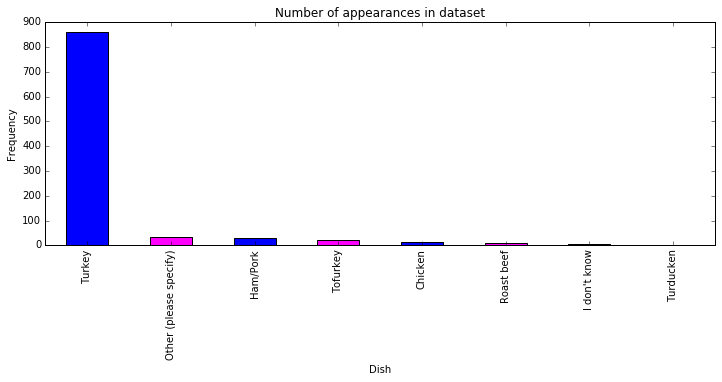

In [3]:
dish_type = pd.value_counts(data['What is typically the main dish at your Thanksgiving dinner?'].values, sort=True)
plt.figure(figsize=(12,4))
dish_type.plot(kind='bar', color=['blue', 'magenta'])
plt.ylabel('Frequency')
plt.xlabel('Dish')
plt.title('Number of appearances in dataset')
plt.show()

In [4]:
data[data["What is typically the main dish at your Thanksgiving dinner?"] == "Tofurkey"]["Do you typically have gravy?"]

4      Yes
33     Yes
69      No
72      No
77     Yes
145    Yes
175    Yes
218     No
243    Yes
275     No
393    Yes
399    Yes
571    Yes
594    Yes
628     No
774     No
820     No
837    Yes
860     No
953    Yes
Name: Do you typically have gravy?, dtype: object

In [5]:
data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"].value_counts()

Apple    514
Name: Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple, dtype: int64

In [6]:
ate_pies = (pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple"])
&
pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan"])
 &
 pd.isnull(data["Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin"])
)

ate_pies.value_counts()

False    876
True     182
dtype: int64

In [7]:
#apple
apple_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'])
apple_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Apple'])
#pumpkin
pumpkin_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'])
pumpkin_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pumpkin'])
#pecan
pecan_isnull = pd.isnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'])
pecan_notnull = pd.notnull(data['Which type of pie is typically served at your Thanksgiving dinner? Please select all that apply. - Pecan'])


In [8]:
no_pies = apple_isnull & pumpkin_isnull & pecan_isnull
only_apple_pies = apple_notnull & pumpkin_isnull & pecan_isnull
only_pumpkin_pies = apple_isnull & pumpkin_notnull & pecan_isnull
only_pecan_pies = apple_isnull & pumpkin_isnull & pecan_notnull
# create a dictionary with pie counts
pie_types = {}
pie_types['Apple'] = pd.value_counts(only_apple_pies)[1]
pie_types['Pumpkin'] = pd.value_counts(only_pumpkin_pies)[1]
pie_types['Pecan'] = pd.value_counts(only_pecan_pies)[1]
pie_types['None'] = pd.value_counts(no_pies)[1]
pie_types['Multiple'] = pd.value_counts(no_pies)[0] - pie_types['Apple'] - pie_types['Pumpkin'] - pie_types['Pecan'] 

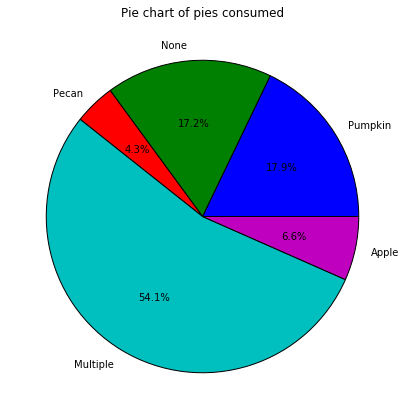

In [10]:
# plot pie data in pie chart 
plt.figure(figsize=(7,7))
plt.pie([int(v) for v in pie_types.values()],labels=pie_types.keys(), autopct='%1.1f%%')
plt.title("Pie chart of pies consumed")
plt.show()

In [21]:
data["Age"].value_counts()

45 - 59    286
60+        264
30 - 44    259
18 - 29    216
Name: Age, dtype: int64

In [27]:
def extract_age(age_str):
    if pd.isnull(age_str):
        return None
    age_str = age_str.split(" ")[0]
    age_str = age_str.replace("+", "")
    return int(age_str)

data["int_age"] = data["Age"].apply(extract_age)
data["int_age"].describe()

count    1025.000000
mean       39.383415
std        15.398493
min        18.000000
25%        30.000000
50%        45.000000
75%        60.000000
max        60.000000
Name: int_age, dtype: float64

In [28]:
data["How much total combined money did all members of your HOUSEHOLD earn last year?"].value_counts()

$25,000 to $49,999      180
Prefer not to answer    136
$50,000 to $74,999      135
$75,000 to $99,999      133
$100,000 to $124,999    111
$200,000 and up          80
$10,000 to $24,999       68
$0 to $9,999             66
$125,000 to $149,999     49
$150,000 to $174,999     40
$175,000 to $199,999     27
Name: How much total combined money did all members of your HOUSEHOLD earn last year?, dtype: int64

In [31]:
def extract_income(income_str):
    if pd.isnull(income_str):
        return None
    income_str = income_str.split(" ")[0]
    if income_str == "Prefer":
        return None
    income_str = income_str.replace(",", "")
    income_str = income_str.replace("$", "")
    return int(income_str)

In [32]:
data["int_income"] = data["How much total combined money did all members of your HOUSEHOLD earn last year?"].apply(extract_income)
data["int_income"].describe()

count       889.000000
mean      74077.615298
std       59360.742902
min           0.000000
25%       25000.000000
50%       50000.000000
75%      100000.000000
max      200000.000000
Name: int_income, dtype: float64

In [39]:
data[data["int_income"] < 150000]["How far will you travel for Thanksgiving?"].value_counts()

Thanksgiving is happening at my home--I won't travel at all                         281
Thanksgiving is local--it will take place in the town I live in                     203
Thanksgiving is out of town but not too far--it's a drive of a few hours or less    150
Thanksgiving is out of town and far away--I have to drive several hours or fly       55
Name: How far will you travel for Thanksgiving?, dtype: int64

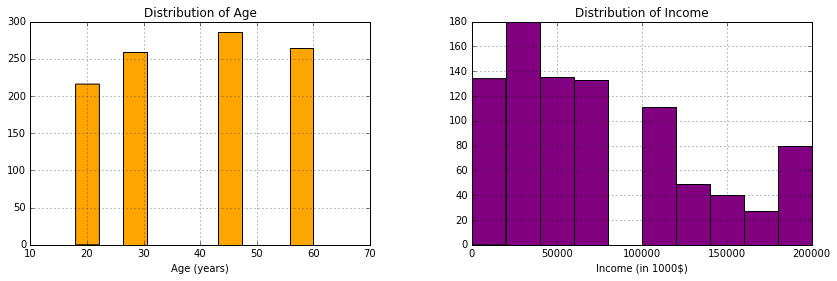

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))

data.hist(column = 'int_age', ax=ax1, color='orange')
ax1.set_title("Distribution of Age")
ax1.set_xlabel("Age (years)")
data.hist(column = 'int_income', ax=ax2, color='purple')
ax2.set_title("Distribution of Income")
ax2.set_xlabel("Income (in 1000$)")

plt.show()

In [40]:
#  low income results <150K
is_low_income = data['int_income'] < 150000
dist_low_income = data['How far will you travel for Thanksgiving?'][is_low_income]
value_dist_low = dist_low_income.value_counts()

# high income results >150K
is_high_income = data['int_income'] > 150000
dist_high_income = data['How far will you travel for Thanksgiving?'][is_high_income]
value_dist_high = dist_high_income.value_counts()

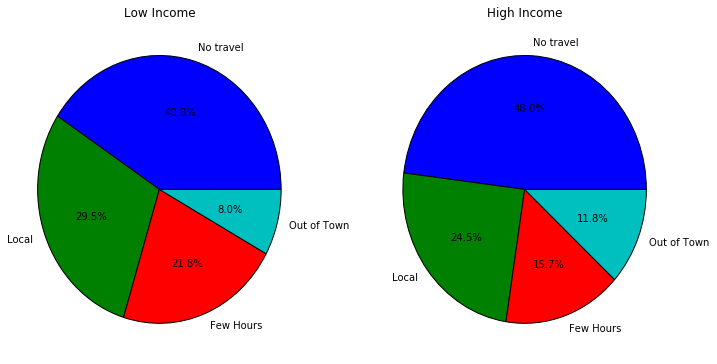

In [41]:
my_label = ["No travel", "Local","Few Hours","Out of Town"]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.pie(value_dist_low, labels=my_label, autopct='%1.1f%%')
ax1.set_title("Low Income")

ax2.pie(value_dist_high, labels=my_label, autopct='%1.1f%%')
ax2.set_title("High Income")
fig.subplots_adjust(hspace=6)
plt.show()

In [42]:
data.pivot_table(
    index="Have you ever tried to meet up with hometown friends on Thanksgiving night?", 
    columns='Have you ever attended a "Friendsgiving?"',
    values="int_age"
)

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,42.283702,37.010526
Yes,41.475410,33.976744


In [43]:
data.pivot_table(
    index="Have you ever tried to meet up with hometown friends on Thanksgiving night?", 
    columns='Have you ever attended a "Friendsgiving?"',
    values="int_income"
)

"Have you ever attended a ""Friendsgiving?""",No,Yes
Have you ever tried to meet up with hometown friends on Thanksgiving night?,,
No,78914.549654,72894.736842
Yes,78750.000000,66019.736842
